匯入套件

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras as ks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


載入資料集

In [12]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)
X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets["Diagnosis"]

print("資料集大小:", X.shape, y.shape)
print("目標分布：\n", y.value_counts())

資料集大小: (782, 53) (782,)
目標分布：
 Diagnosis
appendicitis       463
no appendicitis    317
Name: count, dtype: int64


資料處理

In [13]:
# One-Hot Encoding 類別變數
cat_cols = X.select_dtypes(include=['object']).columns
X_data = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 轉換目標變數
y_data = y.map(lambda val: 1 if val == "appendicitis" else 0)

# NaN 檢查與處理
print("X_data NaN:", X_data.isna().sum().sum())
print("y_data NaN:", y_data.isna().sum())
X_data = X_data.fillna(0)

X_data NaN: 1384
y_data NaN: 0


切分資料集與正規化

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, train_size=0.75, random_state=42, stratify=y_data
)
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# 正規化數值
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

X_train: (586, 111) X_test: (196, 111)


建立ANN模型

In [16]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_mm.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

optimizer = SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

history_1 = model.fit(X_train_mm, y_train, epochs=30, validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,657 (88.50 KB)

 Trainable params: 22,657 (88.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.6244 - loss: 0.6686 - val_accuracy: 0.5678 - val_loss: 0.6750
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6395 - loss: 0.6491 - val_accuracy: 0.5169 - val_loss: 0.6706
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6034 - loss: 0.6472 - val_accuracy: 0.5169 - val_loss: 0.6661
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6043 - loss: 0.6354 - val_accuracy: 0.5085 - val_loss: 0.6618
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6270 - loss: 0.6232 - val_accuracy: 0.5085 - val_loss: 0.6565
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6379 - loss: 0.6083 - val_accuracy: 0.5254 - val_loss: 0.6500
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6338 - loss: 0.6022 - val_accuracy: 0.5254 - val_loss: 0.6426
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6296 - loss: 0.6016 - val_accuracy: 0.5339 - val_lo

繪製訓練曲線

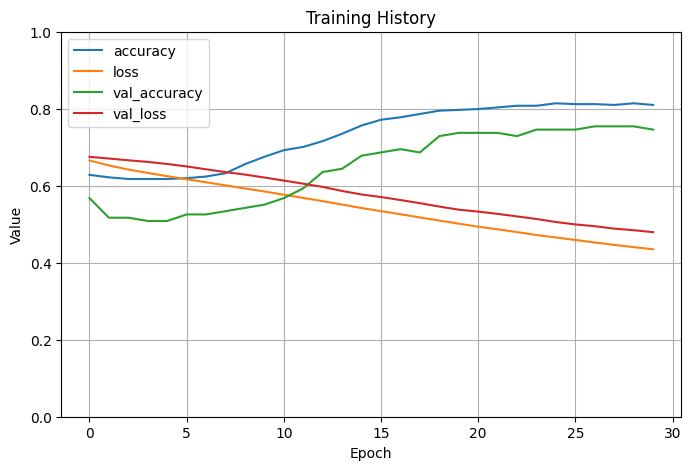

In [17]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)
plt.title("Training History")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

測試集

In [18]:
# 測試集評估
loss, accuracy = model.evaluate(X_test_mm, y_test, verbose=0)
print("\n測試集 Loss: %.2f, Accuracy: %.2f%%" % (loss, accuracy * 100))

# 預測測試集
y_pred_prob = model.predict(X_test_mm).ravel()
y_pred_class = (y_pred_prob > 0.5).astype(int)


測試集 Loss: 0.46, Accuracy: 80.61%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


測試新資料

In [29]:
# 隨機產生一筆符合特徵數的資料
new_data = np.random.rand(1, X_train_mm.shape[1])  # 模擬一筆新病人資料
prediction = model.predict(new_data)
print("新資料預測機率:", prediction)
print("預測分類:", (prediction > 0.5).astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
新資料預測機率: [[0.8687373]]
預測分類: [[1]]


ML vs ANN 比較區塊

In [32]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_mm, y_train)
y_pred_lr = log_reg.predict(X_test_mm)
y_proba_lr = log_reg.predict_proba(X_test_mm)[:, 1]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_mm, y_train)
y_pred_rf = rf.predict(X_test_mm)
y_proba_rf = rf.predict_proba(X_test_mm)[:, 1]

# ANN (已經訓練好的模型)
y_pred_ann = y_pred_class.flatten()
y_proba_ann = y_pred_prob.flatten()

# 結果比較表
results = {
    "Model": ["Logistic Regression", "Random Forest", "ANN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_ann),
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_ann),
    ],
    "AUC": [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_ann),
    ],
}
df_results = pd.DataFrame(results)
print("\n=== 模型比較結果 ===\n", df_results)


=== 模型比較結果 ===
                  Model  Accuracy  F1-score       AUC
0  Logistic Regression  0.857143  0.877193  0.941703
1        Random Forest  0.938776  0.949153  0.989063
2                  ANN  0.806122  0.842975  0.882543


ROC 曲線

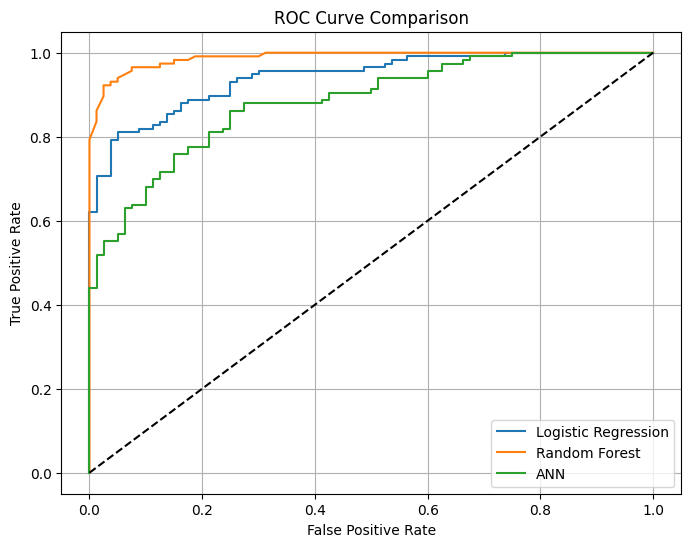

In [33]:
plt.figure(figsize=(8, 6))
for model_name, y_proba in zip(
    ["Logistic Regression", "Random Forest", "ANN"],
    [y_proba_lr, y_proba_rf, y_proba_ann]
):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

混淆矩陣(以 ANN 為例)

In [34]:
cm = confusion_matrix(y_test, y_pred_ann)
print("\nConfusion Matrix (ANN):\n", cm)
print("\nClassification Report (ANN):\n", classification_report(y_test, y_pred_ann))


Confusion Matrix (ANN):
 [[ 56  24]
 [ 14 102]]

Classification Report (ANN):
               precision    recall  f1-score   support

           0       0.80      0.70      0.75        80
           1       0.81      0.88      0.84       116

    accuracy                           0.81       196
   macro avg       0.80      0.79      0.79       196
weighted avg       0.81      0.81      0.80       196

